# Intro

In this notebook I am creating a CNN model to predict classifcation on the famouse CIFAR10 Dataset.

The classifier is a CNN with an architecture consisting of:
- several Convolutional Layers
- several Maxpooling Layers
- several Dropout Layers
- several Batchnormalization Layers
- several Dense Layers

- Data Augumentation


##Imports and EDA

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [68]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.1.0-rc1


In [69]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import keras
import json

pd.set_option('display.max_columns', None, 'display.max_rows', 100)

In [0]:
# Imports for the Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

from tensorflow.keras.models import load_model

In [72]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train, x_test
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [73]:
np.shape(x_train)

(50000, 32, 32, 3)

In [0]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truckt'''.split("\n")

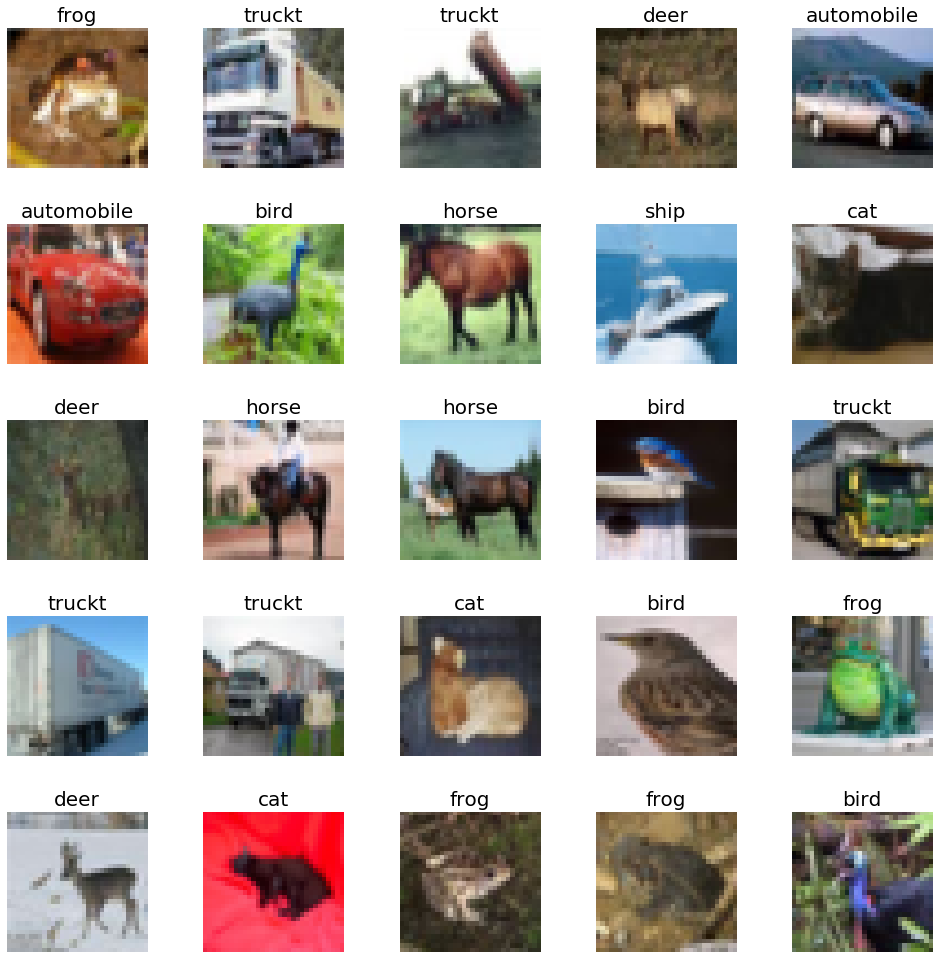

In [75]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()

n_training = len(x_train)

for i in np.arange(0, W_grid*L_grid):
    
    index = np.random.randint(0, n_training)
    axes[i].imshow(x_train[i,:].reshape((32,32,3)))
    axes[i].set_title(labels[y_train[i]], fontsize=20)
    axes[i].set_frame_on(True)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

## Model Creation and Training

In [76]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [0]:
i = Input(shape=x_train[0].shape)
x = BatchNormalization()(i)
x = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu') (i)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
x = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu') (x)
x = MaxPooling2D(pool_size=(2,2)) (x)
x = Dropout(0.2)(x)
x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu') (x)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu') (x)
x = MaxPooling2D(pool_size=(2,2)) (x)
x = Dropout(0.2)(x)
x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu') (x)
x = BatchNormalization()(x)
x = Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu') (x)
x = MaxPooling2D(pool_size=(2,2)) (x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(500, activation='relu')(x)
x = Dense(300, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Data Augumentation to improve generalisation performance
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.2, 1.2)
)

batch_size=32
steps_per_epoch = x_train.shape[0] // batch_size

train_generator = data_generator.flow(
    x_train, y_train, batch_size=batch_size
)

In [80]:
r = model.fit_generator(train_generator,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=(x_test, y_test),
                        epochs=25)


# Save the model
model.save('CNN_cifar10_2.h5')

# Save the history
history = pd.DataFrame(r.history)
history.to_csv('history_CNN_cifar10_2.csv', index=False)

  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/25
1562/1562 [==============================] - 59s 38ms/step - loss: 1.5875 - accuracy: 0.4180 - val_loss: 1.1782 - val_accuracy: 0.5792
Epoch 2/25
1562/1562 [==============================] - 57s 37ms/step - loss: 1.1404 - accuracy: 0.5961 - val_loss: 1.0538 - val_accuracy: 0.6463
Epoch 3/25
1562/1562 [==============================] - 57s 36ms/step - loss: 0.9674 - accuracy: 0.6607 - val_loss: 0.9478 - val_accuracy: 0.6739
Epoch 4/25
1562/1562 [==============================] - 57s 36ms/step - loss: 0.8767 - accuracy: 0.6960 - val_loss: 0.7897 - val_accuracy: 0.7349
Epoch 5/25
1562/1562 [==============================] - 56s 36ms/step - loss: 0.8153 - accuracy: 0.7182 - val_loss: 0.7661 - val_accuracy: 0.7426
Epoch 6/25
1562/1562 [==============================] - 57s 36ms/step - loss: 0.7662 - accuracy: 0.7356 - val_loss: 0.7411 - val_accuracy: 0.7549
Epoch 7/25
1562/1562 [=============================

## Model Evaluation

Examine the development of the Loss result and the accuracy along the epochs

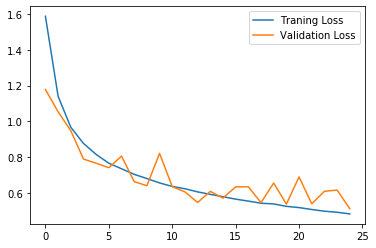

In [83]:
plt.plot(history['loss'], label='Traning Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

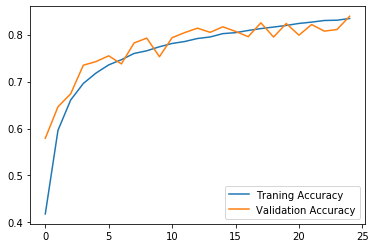

In [84]:
plt.plot(history['accuracy'], label='Traning Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

Both, the loss result and the accuracy tend to improve along the training. Further training would most probably improve the model performance. The model performes comparible on the train and dev set - suggesting a good generalisation.

In [85]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0   

Lets take a look at what have been misclassfied.

Confusion matrix, without normalization
[[785  19  43  28  15   6   8   9  51  36]
 [  3 947   2   0   0   2   2   0   2  42]
 [ 38   1 759  23  57  29  69  14   6   4]
 [  8   4  53 654  54 112  77  20   4  14]
 [  6   2  24  29 845   4  68  18   2   2]
 [  5   2  32  86  42 772  24  35   0   2]
 [  6   1  15  16   9   7 940   1   3   2]
 [  5   1  24  13  51  30   8 861   2   5]
 [ 24  16   7   6   3   3  10   0 905  26]
 [  8  45   3   6   3   0   4   3   4 924]]


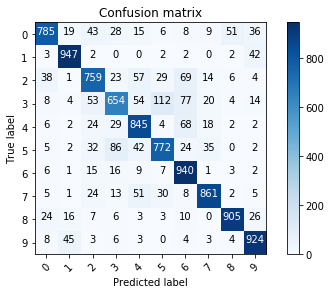

In [87]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

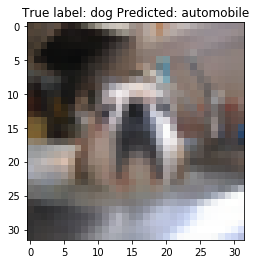

In [89]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[-1]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

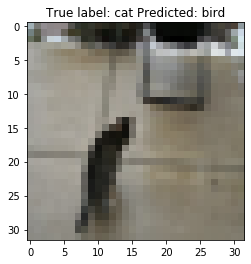

In [90]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[-1]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

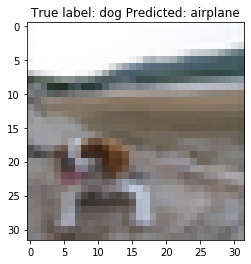

In [91]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[-1]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

I guess many humans will have a problem with these images as well.

## Summary

BIAS:
*   A Dev Set accuracy of 83% have been achieved with only 25 epochs, which is not bat looking at the missclassified images. Setting a Human Level Performance as the best performance the avoidable BIAS might be not that big.
*   The BIAS could be improved by longer training or trying out different hypermarameters such as other optimzers, or addind additional layers. However, 

VARIANCE:
*   The performance on the Train and Dev set seems similar for now. So improving the Variance will be a potential optimisation point later on.



